# Классификация госконтрактов по объектам закупки

#### Задача: необходимо на основе данных с ftp.zakupki.gov.ru научиться определять группу, к которой относится контракт с кодом ОКПД-2 41, 42, 43, 71.1.

Группы могут быть следующими:

1.	Строительно-монтажные работы (СМР)
2.	Проектно-изыскательские работы (ПИР)
3.	Строительный надзор
4.	Подключение коммуникаций
5.	Прочее.

По ОКПД-2 контракты в общем случае должны разделяться так:
- Строительно-монтажные работы (СМР) - 41, 42, 43(кроме нижеперечисленных)
- Проектно-изыскательские работы (ПИР) - 41.1, 71.1
- Подключение коммуникаций - 43.22
- Строительный надзор – четкой группы нет.


Проблема: Далеко не всегда контракты указываются с нужным кодом, поэтому есть проблема как такие контракты "отловить" и определить в нужную группу.

Поэтому задача предполагает многоклассовую классификацию контрактов на основе объекта закупки, который сформулирован естественным языком. Также предполагаем, что могут иметь значение цена контракта и его длительность.
На основе этого на входе данные о контрактах. На выходе необходимо получить группу для каждого контракта.

Иногда контракт может относиться одновременно в несколько групп.

Основные этапы исследования:
1. Загрузка и изучение данных
2. Предварительная обработка
3. Разведочный анализ
4. Создание новых синтетических признаков
5. Работа с текстом
6. Отбор финального набора обучающих признаков
7. Выбор и обучение моделей

In [1]:
pip instal spacy

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "instal" - maybe you meant "install"



In [2]:
pip instal texblob

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "instal" - maybe you meant "install"



In [3]:
!pip install pymorphy2

In [4]:
! python -m spacy download ru_core_news_sm

     ---------------------------------------- 0.0/15.3 MB ? eta -:--:--
     --------------------------------------- 0.0/15.3 MB 330.3 kB/s eta 0:00:47
     --------------------------------------- 0.0/15.3 MB 262.6 kB/s eta 0:00:58
     --------------------------------------- 0.1/15.3 MB 409.6 kB/s eta 0:00:38
     --------------------------------------- 0.1/15.3 MB 595.3 kB/s eta 0:00:26
      -------------------------------------- 0.2/15.3 MB 981.9 kB/s eta 0:00:16
     - -------------------------------------- 0.4/15.3 MB 1.4 MB/s eta 0:00:11
     - -------------------------------------- 0.6/15.3 MB 1.7 MB/s eta 0:00:09
     - -------------------------------------- 0.7/15.3 MB 2.1 MB/s eta 0:00:08
     --- ------------------------------------ 1.2/15.3 MB 2.8 MB/s eta 0:00:05
     ---- ----------------------------------- 1.6/15.3 MB 3.5 MB/s eta 0:00:04
     ------- -------------------------------- 2.9/15.3 MB 5.8 MB/s eta 0:00:03
     ----------- ---------------------------- 4.4/15.3

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\user\\anaconda3\\lib\\site-packages\\packaging-21.3.dist-info\\METADATA'



In [5]:
pip install lightning== 2.0.1

Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following yanked versions: 1.8.0, 2022.6.15, 2022.6.15.post1, 2022.6.15.post2, 2022.7.18, 2022.8.2, 2022.8.9, 2022.8.17, 2022.9.8, 2022.9.22, 2022.10.7, 2022.10.20, 2022.10.25
ERROR: Could not find a version that satisfies the requirement lightning== (from versions: 1.8.0rc1, 1.8.0rc2, 1.8.0.post1, 1.8.1, 1.8.2, 1.8.3, 1.8.3.post0, 1.8.3.post1, 1.8.3.post2, 1.8.4, 1.8.4.post0, 1.8.5, 1.8.5.post0, 1.8.6, 1.9.0rc0, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.9.4, 1.9.5, 2.0.0rc0, 2.0.0, 2.0.1, 2.0.1.post0, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.0.9.post0, 2.1.0rc0, 2.1.0rc1, 2.1.0, 2.1.1, 2.1.2)
ERROR: No matching distribution found for lightning==


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from gensim.models import Word2Vec
from collections import defaultdict, Counter
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.cluster import MiniBatchKMeans

from nltk.probability import FreqDist
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
from collections import defaultdict

import spacy
import nltk
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec

import string
from pymystem3 import Mystem
import re

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

C:\Users\User\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [7]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 1. Загрузка и изучение данных

In [8]:
data = pd.read_csv("C:/Users/User/Documents/проекты/final_steel/dataset_3.csv", on_bad_lines='skip', sep=';')
display(data.head())

,id,contract_number,object_name,object_code,cost,contract_execution_days
0,137313,2590229330821001063,"Средства лекарственные и материалы, применяемы...",21.2,342150.00,21
1,137314,2590229330821001064,"Средства лекарственные и материалы, применяемы...",21.2,342150.00,18
2,137315,2590229330821001065,"Средства лекарственные и материалы, применяемы...",21.2,342150.00,18
3,137320,2590229330821001067,"Средства лекарственные и материалы, применяемы...",21.2,26457423.22,389
4,137321,2590229330821001067,"Средства лекарственные и материалы, применяемы...",21.2,26457423.22,389


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17977844 entries, 0 to 17977843
Data columns (total 6 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   id                       int64  
 1   contract_number          int64  
 2   object_name              object 
 3   object_code              float64
 4   cost                     float64
 5   contract_execution_days  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 823.0+ MB


In [10]:
data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,17977844.0,NaN,NaN,NaN,15609765.304652,10229387.903919,137313.0,6630192.75,14629136.5,23735557.25,35096583.0
contract_number,17977844.0,NaN,NaN,NaN,2764368305208073728.0,705863506358566400.0,142300003514000000.0,2365000356516000256.0,2773363964021000192.0,3366103911519000064.0,4920455863221999616.0
object_name,17977844,362,Продукты пищевые,1967033,NaN,NaN,NaN,NaN,NaN,NaN,NaN
object_code,17977103.0,NaN,NaN,NaN,34.533812,22.055459,1.1,20.5,32.5,42.9,99.0
cost,17977844.0,NaN,NaN,NaN,2710052.662598,124287446.4266,0.01,42000.0,158039.45,598189.7075,142557949831.410004
contract_execution_days,17977844.0,NaN,NaN,NaN,218.076451,156.701339,1.0,94.0,195.0,339.0,2000.0


В датафрейме 17977 тыс. строк, 6 столбцов, признаки в основном числовые, но есть и один столбец, типа объект, который содержит текст. Цена котрактов в основном лежит на одной отметке. Длительность котрактов разрознена. Необходимо добавить разметку соответствия контрактов к видам работ ОКПД по условию задачи.

## 2. Предобработка данных

In [11]:
data.isnull().sum() # проверим пропущенные значения

id                           0
contract_number              0
object_name                  0
object_code                741
cost                         0
contract_execution_days      0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
dupl_number = data[data['contract_number'].duplicated(keep=False)].sort_values(by='contract_number')
print(dupl_number[['contract_number','object_code']].head(10))

full_dupl = dupl_number.duplicated(keep=False).sum()
partial_dupl = len(dupl_number) - full_dupl

print('Полных дубликатов:', full_dupl)
print('Неявных дубликатов: ', partial_dupl)

              contract_number  object_code
4662007    172200003114000131         37.0
4662008    172200003114000131         37.0
4662009    172200003114000140         37.0
4662010    172200003114000140         37.0
7258113    340300119314000001         41.2
7258114    340300119314000001         41.2
13019783  1010100225118000001         35.1
13019782  1010100225118000001         35.1
10039820  1010100225118000004         53.2
10039819  1010100225118000004         53.2
Полных дубликатов: 0
Неявных дубликатов:  5742881


Есть повторяющиеся контракты относящиеся к регистрационному номеру и номеру контракта одновременно, возможно это как допсоглашение, которое делится на два периода, это нужно у точнять у специалиста по закупкам. Убирать неявные дубликаты не будем.

In [14]:
data['object_code'].unique() # проверим уникальные значения контрактов

array([21.2, 32.5, 31. , 26.3, 26.2, 90. , 68.2, 37. , 26.6, 28.2, 26.4,
       35.3, 95.1, 35.1, 85.2, 38.1, 20.1, 22.2, 32.9, 10.8, 85.4, 70.2,
       69.2, 28.9, 49.3, 82.3, 43.9, 20.4, 27.5, 62. , 29.1, 17.1, 17.2,
       20.5, 20.6, 16.2, 25.9,  1.1, 27.4, 27.3, 20.2, 20.3, 25.7, 22.1,
       26.5, 13.9, 55.1, 80.1, 27.2, 36. , 86.1, 86.2, 86.9, 33.1, 74.9,
       81.2, 11. , 14.1, 10.5, 26.7,  1.4, 10.3, 10.1, 23.1, 71.2, 43.3,
       27.9, 18.1, 93.1, 56.1, 80.2, 23.9, 10.2, 10.6, 10.7,  1.2, 53.1,
       19.2, 21.1, 71.1, 66.1, 63.1, 96. , 61.1, 88.9, 61.9, 10.4, 58.1,
       35.2, 38.2, 81.1, 24.4, 23.4, 65.1, 32.4, 52.1, 28.4, 43.2, 52.2,
       58.2, 30.9, 29.3, 15.2, 27.1, 45.2, 53.2,  6.2, 28.1, 95.2, 84.2,
       68.1, 56.2, 61.2, 63.9, 24.3, 64.1, 29.2, 64.9, 41.1,  8.9, 32.3,
       24.1, 24.2,  5.1, 14.3, 42.9, 68.3, 59.1, 47.7, 84.1, 81.3, 33.2,
       49.5, 25.2, 23.5,  2.4, 77.2, 13.2, 26.8, 94.9, 14.2, 23.3, 85.3,
       73.1, 13.1, 25.1, 28.3, 42.2, 43.1, 46.1, 82

In [15]:
# заменим пропущенные значения контрактом 43.2, так как по условию этот контракт есть, а по факту его нет
data['object_code'] = data['object_code'].fillna('43.2')

In [16]:
data['object_name'].unique() # посмотрим уникальные значения названий контрактов

array(['Средства лекарственные и материалы, применяемые в медицинских целях',
       'Изделия готовые прочие', 'Мебель',
       'Оборудование компьютерное, электронное и оптическое',
       'Услуги в области творчества, искусства и развлечений',
       'Услуги по операциям с недвижимым имуществом',
       'Услуги по водоотведению; шлам сточных вод',
       'Машины и оборудование, не включенные в другие группировки',
       'Электроэнергия, газ, пар и кондиционирование воздуха',
       'Услуги по ремонту компьютеров, предметов личного потребления и бытовых товаров',
       'Услуги в области образования',
       'Услуги по сбору, обработке и удалению отходов; услуги по утилизации отходов',
       'Вещества химические и продукты химические',
       'Изделия резиновые и пластмассовые', 'Продукты пищевые',
       'Услуги головных офисов; услуги консультативные в области управления предприятием',
       'Услуги юридические и бухгалтерские',
       'Услуги сухопутного и трубопроводного трансп

In [17]:
# определим в группы котрактов по условию задачи
def match(templ, value):
    try:
      return re.search(f'^{templ}.', value) 
    except Exception as e:
        print(f"{type(e).__name__}: {e}")
        return False
    
def get_group(value):    
    if (match('41', value) or match('42', value) or match('43', value)) and  value not in ('43.9', '42.9', '42.2', '43.2', '41.1', '71.1', '43.2'):  
        return 'Строительно-монтажные работы'
    elif value in ('41.1', '71.1'):  
        return 'Проектно-изыскательские работы'
    elif value in ('43.2'):  
        return 'Подключение коммуникаций'
    elif value in ('43.9', '42.9', '42.2'):  
        return 'Строительный надзор'
    else:
        return 'Прочие'

In [18]:
data['object_code']  = data['object_code'].astype('string')
data['mask'] = data['object_code'].apply(lambda x: get_group(x))
data.sample(5)

,id,contract_number,object_name,object_code,cost,contract_execution_days,mask
6889244,10454927,1254000978816000016,"Электроэнергия, газ, пар и кондиционирование в...",35.3,24300000.00,375,Прочие
15951956,32550131,1401200073222000002,49.5,49.5,5495166.66,330,Прочие
15092949,26369816,2505304195521000015,Продукты пищевые,10.2,2284064.00,216,Прочие
152689,333821,1616706334416000588,Оборудование электрическое,27.4,161789.00,81,Прочие
10192261,17044845,2344680185317000361,"Средства лекарственные и материалы, применяемы...",21.2,813222.50,59,Прочие


In [19]:
data['mask'].value_counts()

Прочие                            16722156
Строительно-монтажные работы        579144
Строительный надзор                 280285
Подключение коммуникаций            214154
Проектно-изыскательские работы      182105
Name: mask, dtype: int64

Пропущенные значения были заполнены в столбце object_code (номера контрактов) номером которого в списке нет, а по условию он есть. Так же мы отнесли к группам номера контрактов.

## 3. Разведовочный анализ

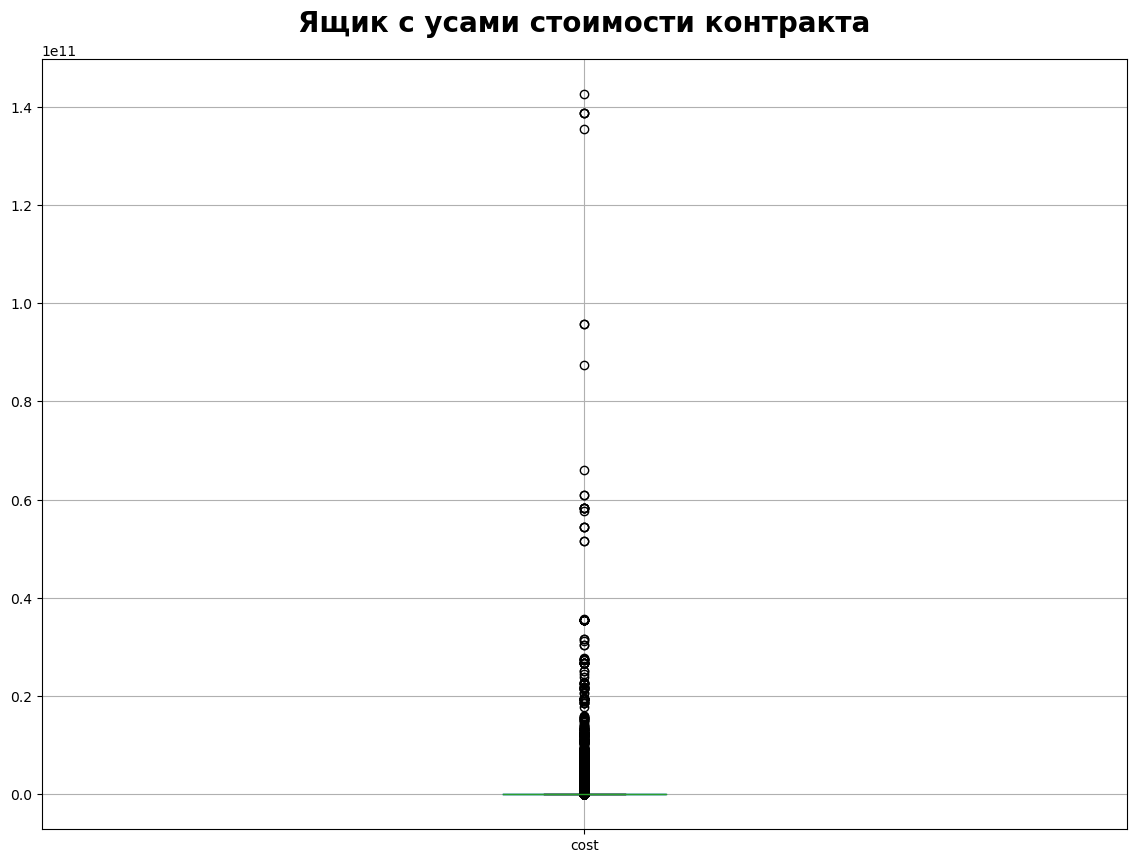

In [20]:
fig = plt.figure(figsize = (14, 10))
data.boxplot(column=['cost'])
plt.title("Ящик с усами стоимости контракта",fontweight="black",pad=20,fontsize=20);

По графику видно что цена котракта имеет отрицательные значения, так же имеет высокий разброс в сторону положительного значения. Разобьем цену на бины и найдем максимум и минимум

In [21]:
# разделим на бины
data['cost'].value_counts(bins=5)

(-142557949.822, 28511589966.29]      17977802
(28511589966.29, 57023179932.57]            25
(57023179932.57, 85534769898.85]             9
(114046359865.13, 142557949831.41]           5
(85534769898.85, 114046359865.13]            3
Name: cost, dtype: int64

In [22]:
data[data['cost']==data['cost'].max()]

,id,contract_number,object_name,object_code,cost,contract_execution_days,mask
17839211,34874361,2772838158719000703,42.1,42.1,1.425579e+11,1497,Строительно-монтажные работы


In [23]:
data[data['cost']==data['cost'].min()]

,id,contract_number,object_name,object_code,cost,contract_execution_days,mask
11114,152380,2667422224021000409,"Продукция лесоводства, лесозаготовок и связанн...",2.4,0.01,383,Прочие
42143,198394,2784331225321000127,"Услуги по сбору, обработке и удалению отходов;...",38.2,0.01,18,Прочие
66867,229893,3271701324721000063,Услуги персональные прочие,96.0,0.01,364,Прочие
66868,229894,3271701324721000064,Услуги персональные прочие,96.0,0.01,390,Прочие
67178,230310,3281600461321000077,Услуги сухопутного и трубопроводного транспорта,49.3,0.01,364,Прочие
...,...,...,...,...,...,...,...
17812438,34845001,2272500647622000609,96.0,96.0,0.01,511,Прочие
17824558,34858470,3910204847021000065,49.3,49.3,0.01,740,Прочие
17852864,34889168,1540610002022000108,45.1,45.1,0.01,49,Прочие
17852929,34889234,1540610002022000109,45.1,45.1,0.01,49,Прочие


Чтобы правильно оценить стоимость контракта, нужно обратится к специалисту предметной области, поэтому в сторону максимума не будем урезать датасет, а в сторону минимума возьмем стоимость контрактов от 15000 руб.

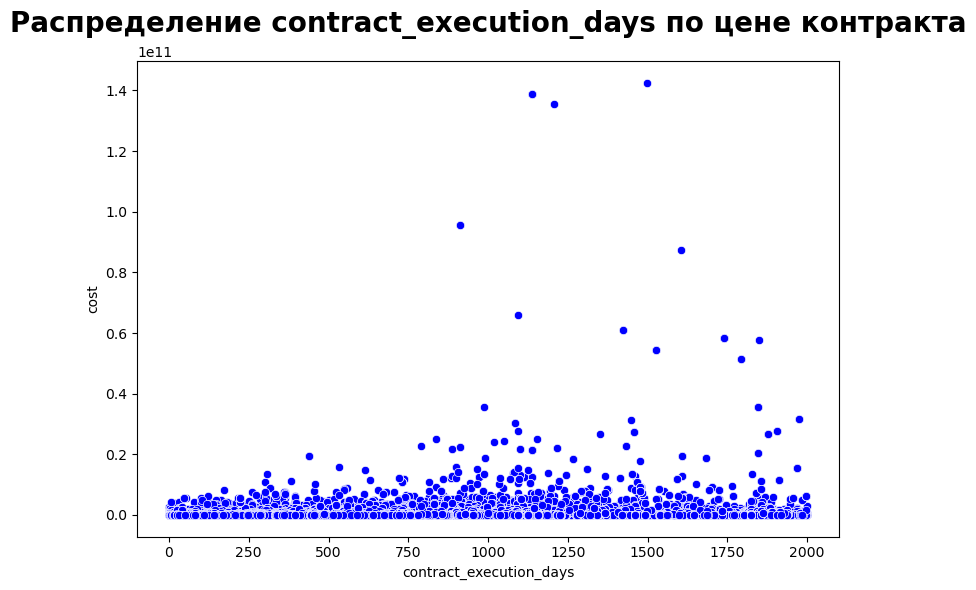

In [24]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,2,x)
        sns.scatterplot(x=col, y="cost",data=data,color="blue")
        plt.title(f"Распределение {col} по цене контракта",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1
        
scatter_plot(["contract_execution_days"])

Мы видим что стоимость контракта от 900 дней и до 2000 дней имеет выбросы, в основмном значения стоимости поднимаются до отметки 0,4.

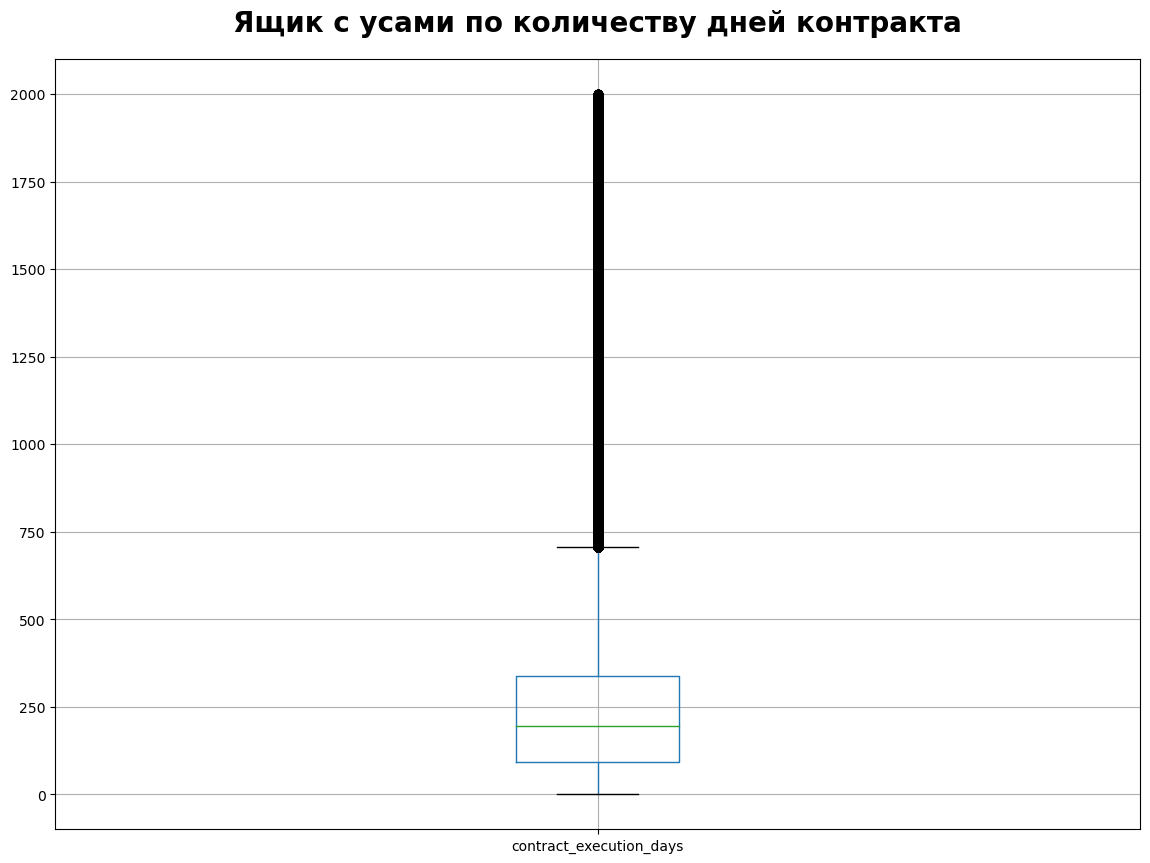

In [25]:
fig = plt.figure(figsize = (14, 10))
data.boxplot(column=['contract_execution_days'])
plt.title("Ящик с усами по количеству дней контракта",fontweight="black",pad=20,fontsize=20);

Выбросы по количеству дней начинаются от 700 дней и свыше 2000 дней. В этом случае нужно уточнять у специалиста сколько может длится котракт по кадой группе ОКПД. Мы обрежем аномальные значения свыше 2000 дней.

In [26]:
data = data.query('(cost > 15000 & contract_execution_days <= 2000)')

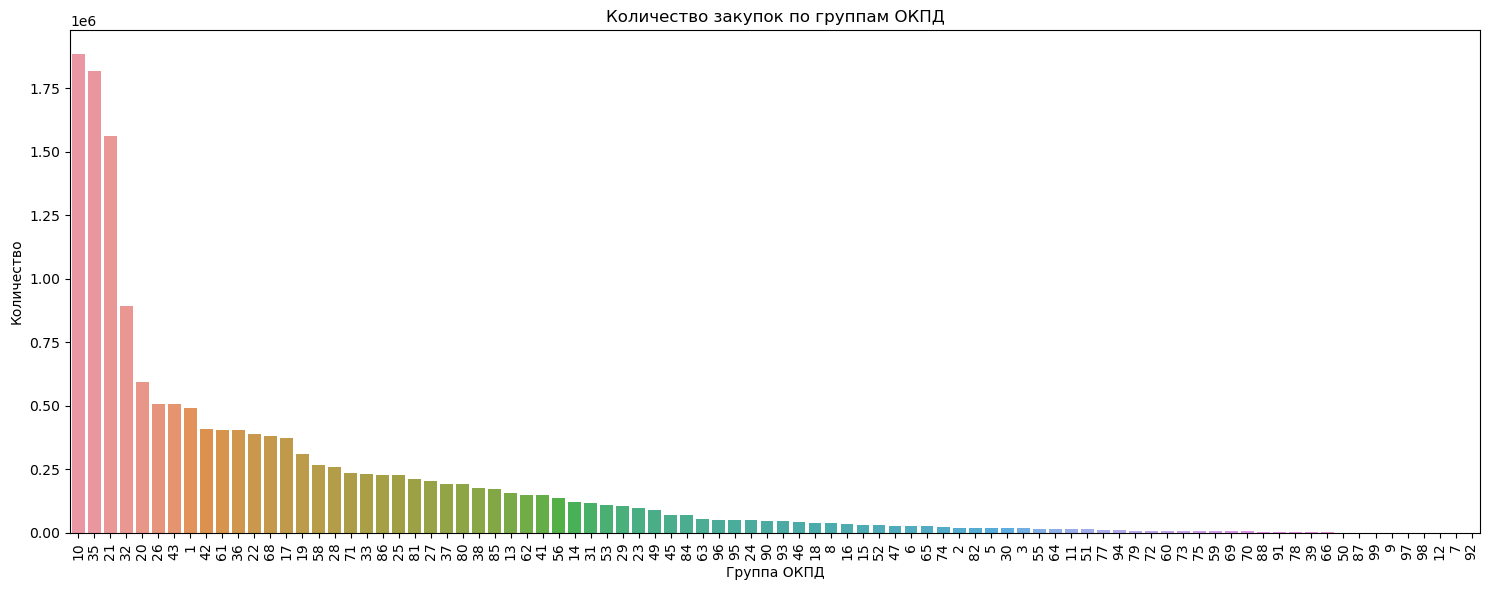

In [27]:
data['code_int'] = data['object_code'].apply(lambda x: '.'.join(x.split('.')[:1]))

plt.figure(figsize=(15, 6))
sns.countplot(data=data, x='code_int', order=data['code_int'].value_counts().index)
plt.title('Количество закупок по группам ОКПД')
plt.xlabel('Группа ОКПД')
plt.ylabel('Количество')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Самая большая группа ОКПД относится к прочим, здесь большое количество контрактов под номером 10,35,21,32,20,26, начиная от 63 и выше, количество контрактов значительно уменьшается, и возможно остальные котракты имеют единичный экземпляр.

Так как мощности на вычеслительных ресурсах компьютера не хватает чтобы обработать текст, для обучения и тестирования мы возьмем случайных 100 тыс. строк

## 4. Создание новых синтетических признаков

In [28]:
# создадим признак цена котракта за один день
data['price_per_day'] = data['cost'] / data['contract_execution_days']

#создадим столбец по количеству лет контракта
data['number_year'] = data['contract_execution_days'] / 365

#добавим сгруппированный по длительности контракта равным 2 годам
data['year2'] = data['number_year']//2

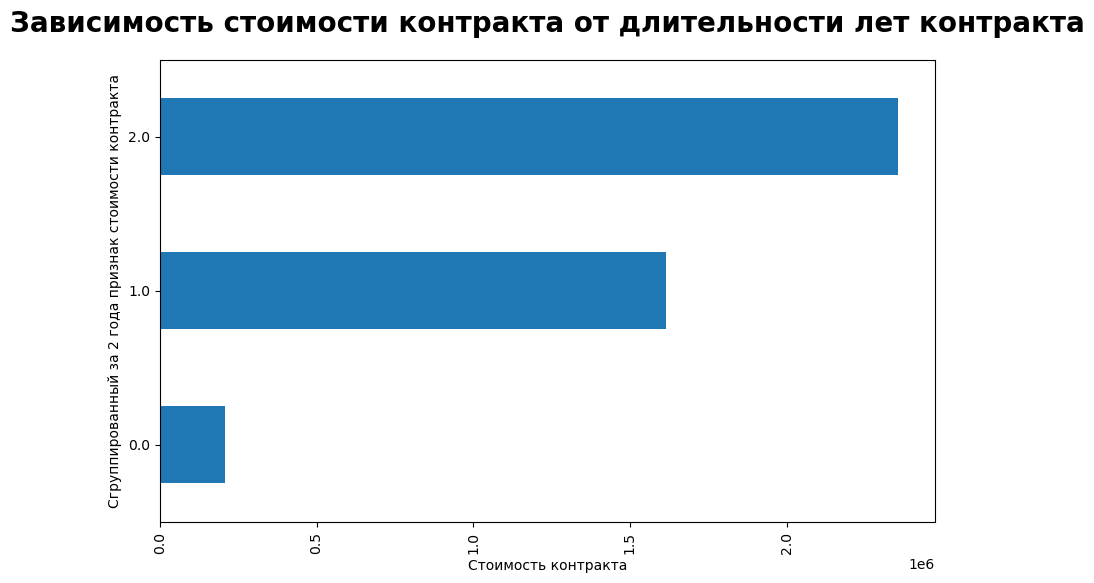

In [29]:
#Посмотрим зависимость стоимости от возраста на тренировочном датасете
fig = plt.figure(figsize = (10, 6))
data.groupby('year2').cost.median().plot(kind='barh')
plt.xlabel("Стоимость контракта")
plt.ylabel("Сгруппированный за 2 года признак стоимости контракта")
plt.title("Зависимость стоимости контракта от длительности лет контракта", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

Мы видим что большая часть контрактов составляет почти 4 года, попробуем их выделить отдельно в признак длительные котракты

In [30]:
data['long_contracts'] = data['year2'].apply(lambda x: 1 if x>1 else 0)

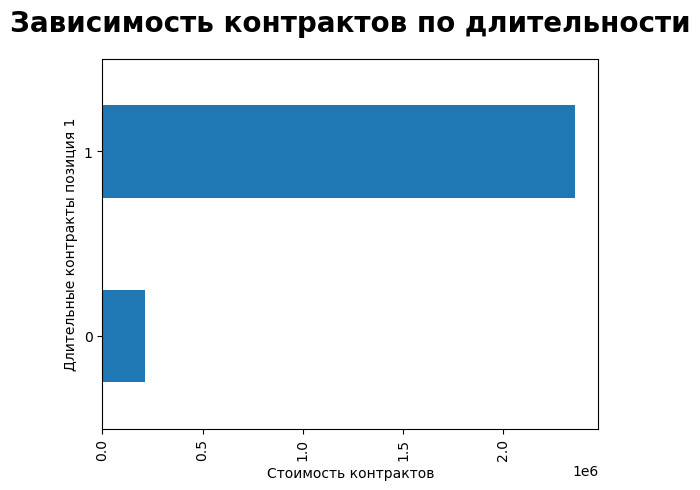

In [31]:
data.groupby('long_contracts').cost.median().plot(kind='barh')
plt.xlabel("Стоимость контрактов")
plt.ylabel("Длительные контракты позиция 1")
plt.title("Зависимость контрактов по длительности", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [32]:
#числовые признаки
num_cols = ['contract_number', 'object_code', 'cost', 'contract_execution_days', 'number_year',\
            'year2']

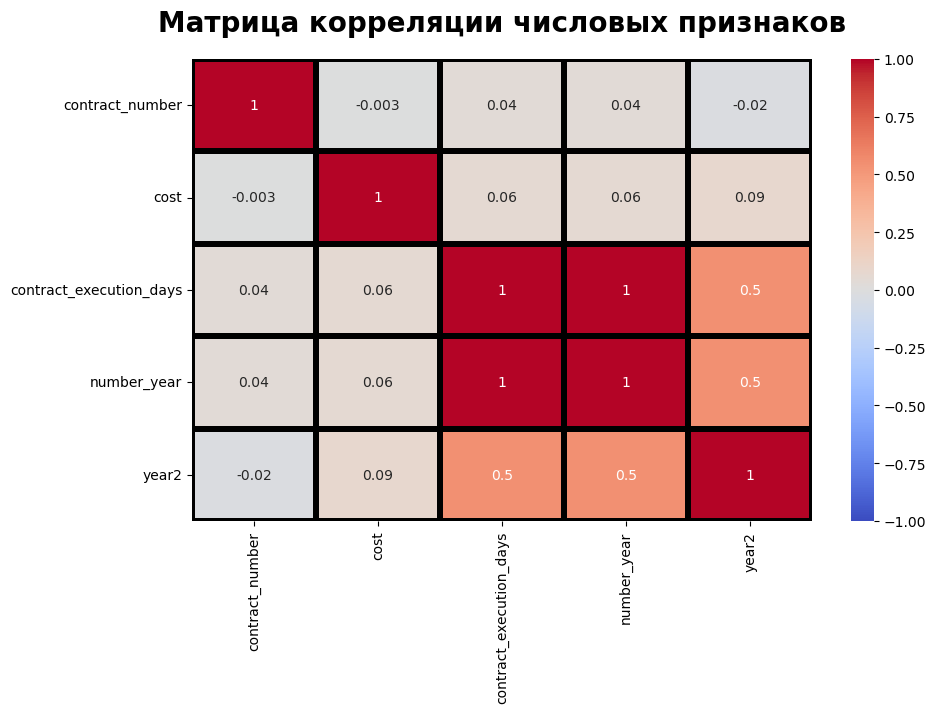

In [33]:
fig = plt.figure(figsize = (10, 6))
plt.title("Матрица корреляции числовых признаков", pad=20, fontweight="black", fontsize=20)
sns.heatmap(data[num_cols].corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, 
            cmap= 'coolwarm', linewidths=3, linecolor='black');

In [34]:
data.drop(columns=['number_year', 'id'], axis=1, inplace=True) # месяц тоже можно удалить, он сильно коррелирует

В ходе работы еще раз посмотрим какие признаки взять для обучения модели.

## 5. Pабота с текстом

In [35]:
data = data.sample(100000) # урежем датасет, так как мощности компьютера не хватит обработать 1 млн. строк

In [36]:
query = '''object_code.str.contains("41.") or object_code.str.contains("42.") or object_code.str.contains("43.") or object_code == "71.1" '''
data = data.query(query, engine='python')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7734 entries, 2041225 to 3514927
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   contract_number          7734 non-null   int64  
 1   object_name              7734 non-null   object 
 2   object_code              7734 non-null   string 
 3   cost                     7734 non-null   float64
 4   contract_execution_days  7734 non-null   int64  
 5   mask                     7734 non-null   object 
 6   code_int                 7734 non-null   object 
 7   price_per_day            7734 non-null   float64
 8   year2                    7734 non-null   float64
 9   long_contracts           7734 non-null   int64  
dtypes: float64(3), int64(3), object(3), string(1)
memory usage: 664.6+ KB


In [38]:
en_core = spacy.load('ru_core_news_sm')
patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+" # избавимся от символов, цифр и латинских букв

def lemmatize(text): #напишем функцию лемматизации для русского текста
    text = text.lower()   
    return " ".join([token.lemma_ for token in en_core(text)])

def clear_text(text): #напишем функцию для очистки текста
    text = re.sub(patterns, ' ', text)
    y = " ".join(text.split())
    return y

data['object_name'] = data['object_name'].apply(clear_text)#перепишем столбец применив функции

data['object_name'] = data['object_name'].apply(lemmatize)


print('Очищенный и лемматизированный текст:', data.object_name.sample)

Очищенный и лемматизированный текст: <bound method NDFrame.sample of 2041225     сооружение и строительный работа в область гра...
8968383     услуга в область архитектура и инженерный техн...
5645891     сооружение и строительный работа в область гра...
7617279                работа строительный специализированный
9184173     сооружение и строительный работа в область гра...
                                  ...                        
2036650     сооружение и строительный работа в область гра...
13309824    услуга в область архитектура и инженерный техн...
3473511     услуга в область архитектура и инженерный техн...
9541197                работа строительный специализированный
3514927                  здание и работа по возведение здание
Name: object_name, Length: 7734, dtype: object>


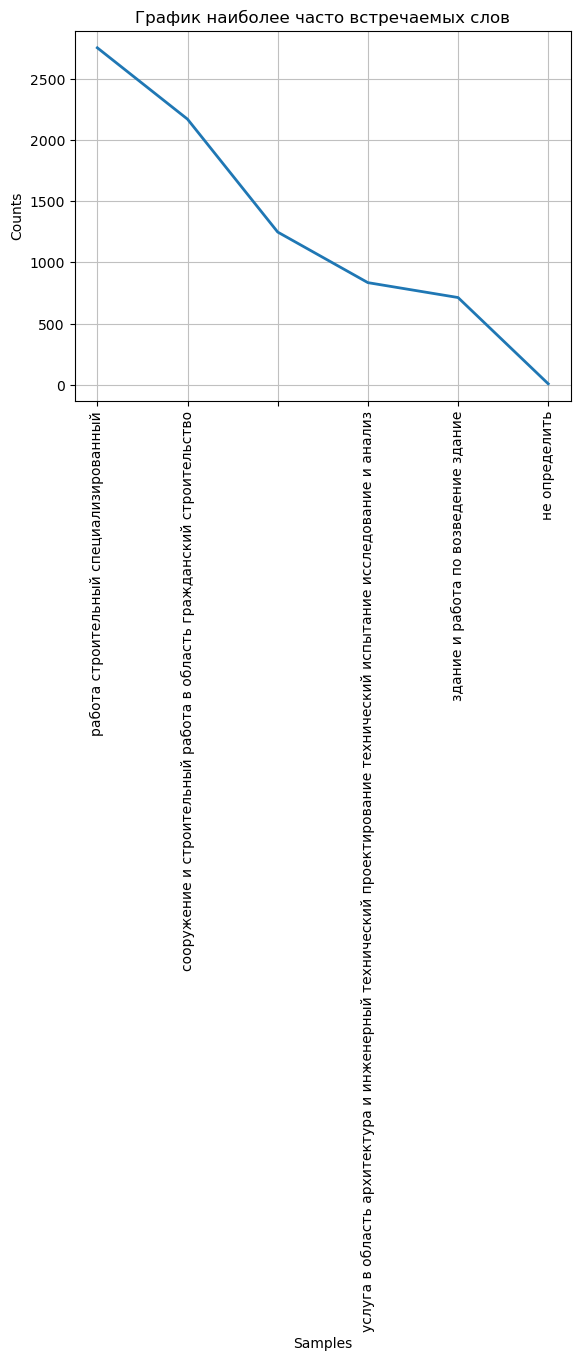

<Figure size 2800x3800 with 0 Axes>

In [39]:
corpus = list(data['object_name'])
plt.title('График наиболее часто встречаемых слов')
fdist = FreqDist(corpus).plot(20, cumulative=False)
plt.figure(figsize=(28, 38));
None

In [40]:
data.head()

,contract_number,object_name,object_code,cost,contract_execution_days,mask,code_int,price_per_day,year2,long_contracts
2041225,3810701019719000032,сооружение и строительный работа в область гра...,42.1,1.685503e+06,64,Строительно-монтажные работы,42,26335.982188,0.0,0
8968383,1143515185720000010,услуга в область архитектура и инженерный техн...,71.1,3.070000e+08,896,Проектно-изыскательские работы,71,342633.928571,1.0,0
5645891,3523100146619000024,сооружение и строительный работа в область гра...,42.1,2.764008e+06,44,Строительно-монтажные работы,42,62818.366818,0.0,0
7617279,1121516685821000043,работа строительный специализированный,43.2,2.883764e+05,59,Подключение коммуникаций,43,4887.735593,0.0,0
9184173,3471501612620000003,сооружение и строительный работа в область гра...,42.1,1.187158e+06,51,Строительно-монтажные работы,42,23277.607843,0.0,0


В результате самые часто встречаемые "слова работа строительный специализированный", так же "сооружений и строительный работа"

## 6. Отбор финального набора обучающих признаков

In [41]:
X = data.drop(['object_name', 'price_per_day', 'object_code', 'year2', 'long_contracts'], axis=1)

In [42]:
le = LabelEncoder()
le.fit(data['mask'])
y = le.transform(data['mask'])
y

array([2, 1, 2, ..., 1, 0, 2])

In [43]:
tfidf = TfidfVectorizer(max_features=1700, min_df=5, max_df=0.7, stop_words=stopwords.words('russian'))


X = data['object_name']
tfidf_X = tfidf.fit_transform(X).toarray()

tfidf = pd.DataFrame(tfidf_X)
tfidf['contract_execution_days'] = data['contract_execution_days'].values
tfidf['long_contracts'] = data['long_contracts'].values

tfidf.shape

(7734, 19)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, y, test_size=0.3)
print(X_train.shape, X_test.shape)

(5413, 19) (2321, 19)


In [45]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(tfidf)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


## 7. Выбор и обучение моделей

#### Модель SVC классификатора опорных векторов

In [46]:
model_svc = SVC(C=100)
model_svc.fit(X_train, y_train)

y_pred = model_svc.predict(X_test)
y_pred

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([2, 2, 2, ..., 2, 2, 2])

In [47]:
model = model_svc.score(X_test_scaled, y_test)
print(f'F-мера модели SVC: {model}')

F-мера модели SVC: 0.5816458423093495


### Наивный байесовский классификатор

In [48]:
bagwords = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('russian')) 
bagwords_X = bagwords.fit_transform(X).toarray()

bagwords_X_train, bagwords_X_test, bagwords_y_train, bagwords_y_test = train_test_split(bagwords_X,
                                                                                        y,
                                                                                        test_size=0.2,
                                                                                        random_state=0)

naive_bayes = MultinomialNB()
bagwords_nb = naive_bayes.fit(bagwords_X_train, bagwords_y_train)
bagwords_nb_predictions = bagwords_nb.predict(bagwords_X_test)

bagwords_nb_f1 = f1_score(bagwords_y_test, bagwords_nb_predictions, average='weighted')
bagwords_nb_precision = precision_score(bagwords_y_test, bagwords_nb_predictions, average='weighted')
print(f'F-мера модели "Мешок слов": {round(bagwords_nb_f1, 3)}, точность: {round(bagwords_nb_precision, 3)}')

F-мера модели "Мешок слов": 0.568, точность: 0.546


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Классификатор дерева решений

In [49]:
model = DecisionTreeClassifier(max_depth=20, criterion='gini')
tfidf_nb = model.fit(X_train, y_train)
tfidf_nb_predictions = model.predict(X_test)
tfidf_nb_f1 = f1_score(y_test, tfidf_nb_predictions, average='weighted')
tfidf_nb_precision = precision_score(y_test, tfidf_nb_predictions, average='weighted')
print(f'F-мера модели TF-IDF: {round(tfidf_nb_f1, 3)}, точность: {round(tfidf_nb_precision, 3)}')

F-мера модели TF-IDF: 0.531, точность: 0.524


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


### Многослойный классификатор персептронов

In [50]:
model = MLPClassifier(random_state=1, max_iter=10)
tfidf_nb = model.fit(X_train, y_train)
tfidf_nb_predictions = model.predict(X_test)
tfidf_nb_f1 = f1_score(y_test, tfidf_nb_predictions, average='weighted')
tfidf_nb_precision = precision_score(y_test, tfidf_nb_predictions, average='weighted')
print(f'F-мера модели TF-IDF: {round(tfidf_nb_f1, 3)}, точность: {round(tfidf_nb_precision, 3)}')

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


F-мера модели TF-IDF: 0.522, точность: 0.573


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


### Отчет


    Загрузка csv файла объемом 25Гб. Поскольку файл не помещался в памяти, было принято решение загрузить его в базу данных. В процессе загрузки данные загружались порциями, при возникновении исключений, строка отбрасывалась. В базу данных загружала необходимые признаки:

    contract_number (номер контракта),
    object_name (наименование услуги),
    object_code (код услуги),
    cost (стоимость),
    contract_execution_days (длительность контракта в днях - рассчитывался как разница дат начала и окончания контракта).

    В ходе работы изучила и провела разведочный анализ данных. Сделала очистку данных от дублей и пропусков, а также от пустых строк и латинских символов и цифр. Были удалены выбросы по длительности контракта и стоимости работ. В результате были созданы новые синтетические признаки, такие как длинные контракты, т.е. в зависимости от стоимости работ и их длительности.
    
    При работе с текстом была осуществлена очистка, лемматизация и токенизация текста, так же были удалены стопслова. 
    Для кодировки таргета, т.е. группы контракта был использован LabelEncoder, для текста TfidfVectorizer.
    В итоговые признаки были взяты длительность контракта в днях и самые длинные контракты. Данные были разделены на обучающую и тестовую выборку, а так же масштабированы MinMaxScaler.
    
    Выполнена задача по классификации определения группы, к которой относится контракты. Классификация была выполнена с использованием разных моделей:

    Модель SVC классификатора опорных векторов SVC 
    Наивный байесовский классификатор CountVectorizer
    Классификатор дерева решений DecisionTreeClassifier
    Многослойный классификатор персептронов MLPClassifier
    
    В качестве метрики была выбрана точность F-мера. В результате лучшую метрику показала модель SVC классификатора опорных векторов 0,57. Для повышения точности необходимо дополнительно делать кластеризацию по номерам контрактов. 